In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [34]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=10e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        

    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        w = np.zeros(X.shape[1])
        
        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]
                    
                w = new_w.copy()
                
                self.weights_.append(w)
                # print("weights: ", self.weights_)
                self.mse_.append(mean_squared_error(y, X.dot(w)))
                
        self.w_ = self.weights_[np.argmin(self.mse_)]
        
        return self
        
        
    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        return X.dot(self.w_)

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
data_demo = pd.read_csv(DATA_PATH + "weights_heights.csv")

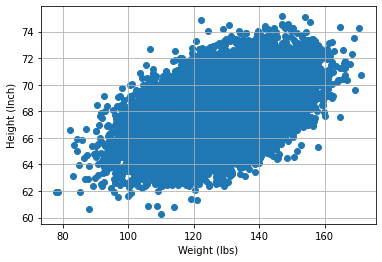

In [5]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (Inch)")
plt.grid();

In [6]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

In [35]:
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train_scaled, y_train)

100%|██████████| 3/3 [00:12<00:00,  4.28s/it]


SGDRegressor()

In [10]:
len(sgd_regressor.mse_)

52500

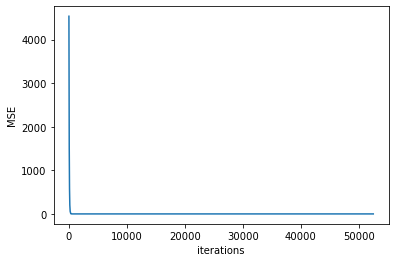

In [11]:
plt.plot(range(len(sgd_regressor.mse_)), sgd_regressor.mse_)
plt.xlabel("iterations")
plt.ylabel("MSE");

In [14]:
print("minimal value of MSE:")
print(min(sgd_regressor.mse_))

minimal value of MSE:
2.7151346858391103


In [17]:
print("the best weights:")
print(sgd_regressor.w_)

the best weights:
[67.98990048  0.94581066]


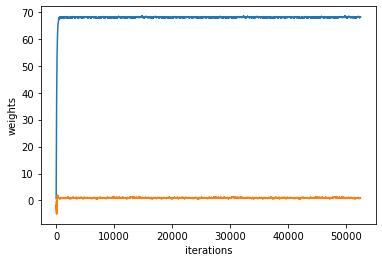

In [18]:
plt.plot(range(len(sgd_regressor.weights_)), sgd_regressor.weights_)
plt.xlabel("iterations")
plt.ylabel("weights");

In [19]:
y_valid_predicted = sgd_regressor.predict(X_valid_scaled)

In [24]:
sgd_holdout_mse = mean_squared_error(y_valid, y_valid_predicted)
print("MSE for holdout dataset with SGD:")
print(sgd_holdout_mse)

MSE for holdout dataset with SGD:
2.6708179904404243


In [36]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_predicted_linreg = linreg.predict(X_valid_scaled)
print("coeffs of the linreg: ", 
      "w1: ", linreg.coef_,
      "w0: ", linreg.intercept_)

coeffs of the linreg:  w1:  [0.94537278] w0:  67.98930834742858


In [30]:
linreg_holdout_mse = mean_squared_error(y_valid, y_predicted_linreg)
print("MSE for holdout dataset with linear regression:")
print(linreg_holdout_mse)

MSE for holdout dataset with linear regression:
2.6708307676676344


In [31]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print("Correct!")
except AssertionError:
    print(
        "Something's not good.\n Linreg's holdout MSE: {}"
        "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, sgd_holdout_mse)
    )

Correct!
